In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
path = 'C:/Users/YONSAI/AppData/Local/Microsoft/Windows/Fonts'
fm.fontManager.addfont(path + '/D2Coding-Ver1.3.2-20180524-all.ttc')
plt.rcParams['font.family'] = 'D2Coding'

1) Titanic
- embark_town, sex > 생존율
- 나이 > displot

In [3]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
dt = titanic.pivot_table('survived', 'embark_town', 'sex')
dt

sex,female,male
embark_town,,
Cherbourg,0.876712,0.305263
Queenstown,0.750000,0.073171
Southampton,0.689655,0.174603


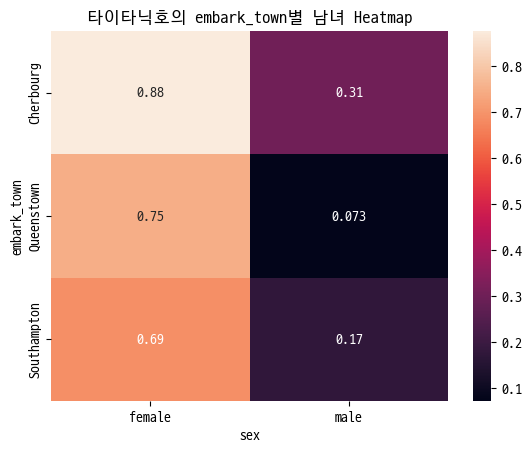

In [10]:
sns.heatmap(dt, annot=True)
plt.title('타이타닉호의 embark_town별 남녀 Heatmap')
plt.show()

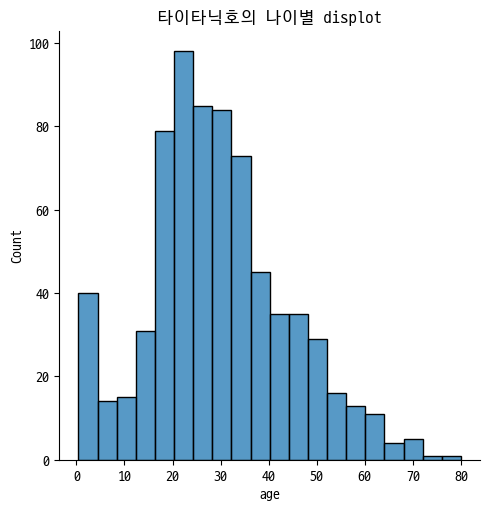

In [13]:
sns.displot(x='age', data=titanic)
plt.title('타이타닉호의 나이별 displot')
plt.show()

2) CCTV
- 자치구 법정 순
- 자치구 이름
- CCTV 댓수

In [16]:
filename = '../02.Pandas/data/서울시 자치구 년도별 CCTV 설치 현황_221231기준.csv'
cctv = pd.read_csv(filename, encoding='euc-kr', thousands=',')
cctv.head()

,구분,총계,2013년 이전 설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
0,계,91341,2804,3097,3981,6576,8850,11566,11024,13151,11912,9144,9236
1,종로구,1980,36,540,107,161,131,158,152,69,250,85,291
2,중 구,2584,130,87,77,236,240,372,386,155,361,403,137
3,용산구,2847,44,50,68,83,295,491,115,322,623,422,334
4,성동구,4047,58,99,110,366,279,945,459,647,485,367,232


In [17]:
cctv.drop([0], inplace=True)
cctv.set_index('구분', inplace=True)
cctv.head()

,총계,2013년 이전 설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
구분,,,,,,,,,,,,
종로구,1980,36,540,107,161,131,158,152,69,250,85,291
중 구,2584,130,87,77,236,240,372,386,155,361,403,137
용산구,2847,44,50,68,83,295,491,115,322,623,422,334
성동구,4047,58,99,110,366,279,945,459,647,485,367,232
광진구,3480,507,82,84,64,21,465,443,709,172,662,271


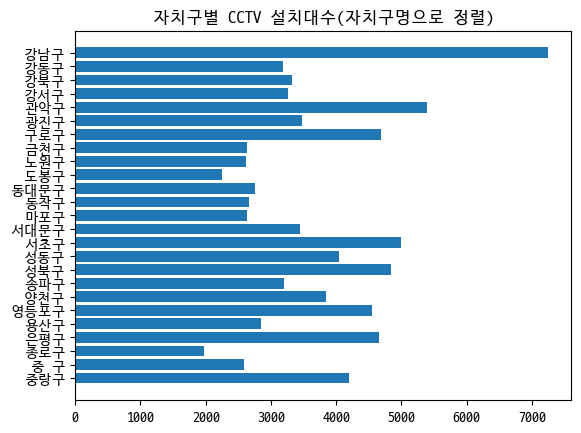

In [19]:
si = cctv.총계.sort_index(ascending=False)
plt.barh(si.index, si.values)
plt.title('자치구별 CCTV 설치대수(자치구명으로 정렬)')
plt.show()

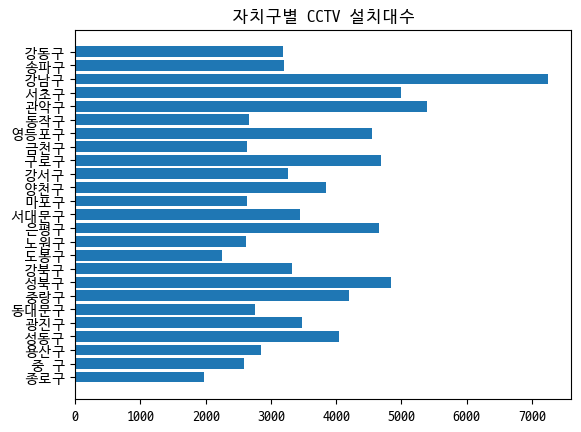

In [18]:
plt.barh(cctv.index, cctv.총계)
plt.title('자치구별 CCTV 설치대수')
plt.show()